# Lab - Filtragem Digital

Esta atividade explora 3 diferentes maneiras de se realizar a filtragem digital.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import lfilter, ellip, freqz

1) Considere para n=0...31, o sinal $x_1[n]$ uma senoide de baixa frequência com 2 ciclos exatos, o sinal $x_2[n]$ uma senoide de alta frequência com 6 ciclos exatos e o sinal x sendo a soma destes dois. Considere para n=0..63, o sinal $x_0[n]= \{x[n]$, n=0..31; 0, n=32...63\}.

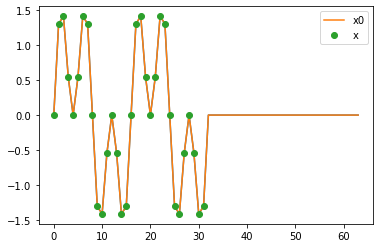

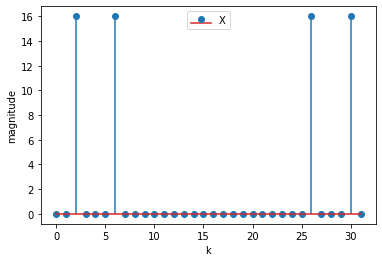

In [2]:
n = arange(32)
x1 = sin(n*2*pi*2/32)
x2 = sin(n*2*pi*6/32)
x = x1+x2
x0 = pad(x, (0,32))
plot(x0)

plot(x0, label='x0')
plot(x, 'o', label='x')
legend()
show()
stem(abs(fft(x)), label='X')
xlabel('k')
ylabel('magnitude')
legend()
show()

2) Obtenha os coeficientes de um filtro elíptico de quarta ordem com frequência normalizada de corte igual a 0,25 ($w=\pi/4$). Visualize o espectro do sinal x e a resposta em frequência do filtro calculado, no mesmo eixo, para frequências de 0 a $\pi$.

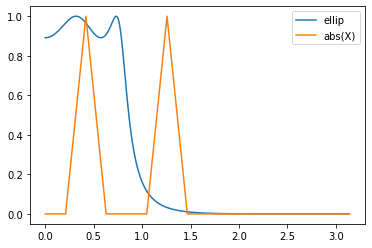

In [3]:
X = abs(fft(x))
X = X/max(X)
nx = linspace(0, pi, 16)

b, a = ellip(4, 1, 80, 0.25)
w, h = freqz(b, a)

plot(w, abs(h), label='ellip')
plot(nx, X[:16], label='abs(X)')
legend()

4) filtre o sinal x0 com a função aplicando a equação recursiva de diferenças com os coeficientes do filtro elíptico (função signal.lfilter()) obtendo y1 com 64 pontos. 

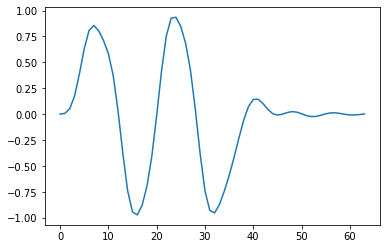

In [4]:
y1 = lfilter(b, a, x0)
plot(y1)

5) filtre o sinal x realizando a convolução com a resposta impulsional do filtro (obtendo sinal com 64 pontos) obtendo y2. Dica: pode-se obter $h[n]$ ao se aplicar impulso $d[n]$ na entrada do filtro.

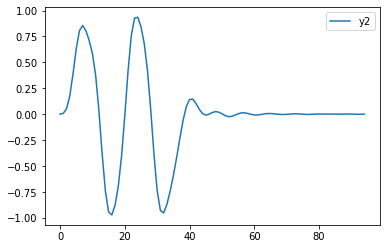

In [5]:
d = zeros(64)
d[0] = 1

hn = lfilter(b, a, d)
y2 = convolve(x, hn)
plot(y2, label='y2')
legend()

6) filtre o sinal x0, fazendo produto no domínio da frequência com a resposta em frequência do filtro (com 64 pontos) obtendo $Y3=X H$, e depois $y3$ pela transformada de Fourier inversa. Plote a magnitude de $Y3$ juntamente com a magnitude de $H$, de $0...2\pi$.

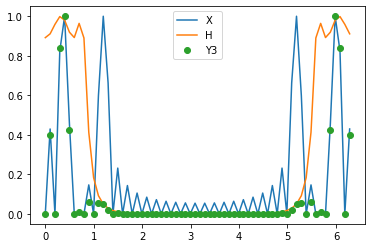

In [24]:
HN = fft(hn)
X = fft(x0, 64)
Y3 = X * HN
y3 = ifft(Y3)

nn = linspace(0, 2*pi, 64, endpoint=True)

plot(nn, abs(X)/max(abs(X)), label='X')
plot(nn, abs(HN), label='H')
plot(nn, abs(Y3)/max(abs(Y3)), 'o', label='Y3')
legend()

7) plote os 3 resultados no mesmo eixo: <br>
   a) No tempo <br>
   b) Em frequência <br>

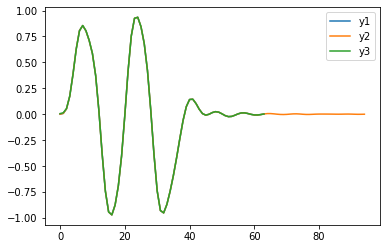

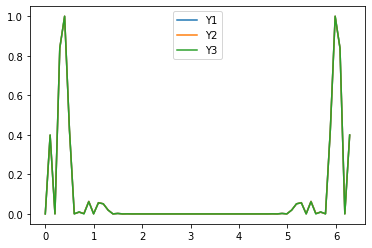

In [27]:
figure(1)
plot(y1, label='y1')
plot(y2, label='y2')
plot(y3, label='y3')
legend()

Y1 = fft(y1)
Y2 = fft(y2, 64)

figure(2)
plot(nn, abs(Y1)/max(abs(Y1)), label='Y1')
plot(nn, abs(Y2)/max(abs(Y2)), label='Y2')
plot(nn, abs(Y3)/max(abs(Y3)), label='Y3')
legend()